# Alura - Imersão Dados 3ª Edição

Notebook criado para a terceira aula e resolução de desafios da imersão de dados realizada pela [Alura](https://www.alura.com.br/imersao-dados).

Os notebooks das outras aulas podem ser encontrados no meu respositório do [Github](https://github.com/claudineipereira/alura-imersaodados3).

## Aula 3: Correlações, causalidade e relações entre genes

In [1]:
# importa o pandas e lê os dados em csv a partir de uma url
# importa seaborn para os gráficos
# importa matplotlib para configurar os gráficos
# importa o numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression='zip')

In [2]:
# renomeia coluna 'droga'
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

### Mostra as 5 primeiras entradas do dataframe

In [3]:
dados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### Tabela de frequência

Utilizaremos a função *crosstab* do pandas para gerar uma tabela de frequência. 

Documentação: [pandas.crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html?highlight=frequency%20table)

Na tabela abaixo, é gerada uma tabela de frequência relacionando as colunas *dose* e *tempo* à coluna *tratamento*.

In [4]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

Na tabela abaixo, é gerada uma tabela normalizada utilizando os dados da tabela anterior.

In [5]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], 
            normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Aqui geramos uma tabela utilizando os dados das tabelas anteriores associados à média dos dados contidos na coluna *g-0*.

In [6]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], 
           values=dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

### Gráficos de dispersão e regressão linear

Desta vez, queremos analisar os dados relacionando as colunas *g-0* e *g-3* utilizando um ***gráfico de dispersão*** da biblioteca *Seaborn*. 

Documentação: [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

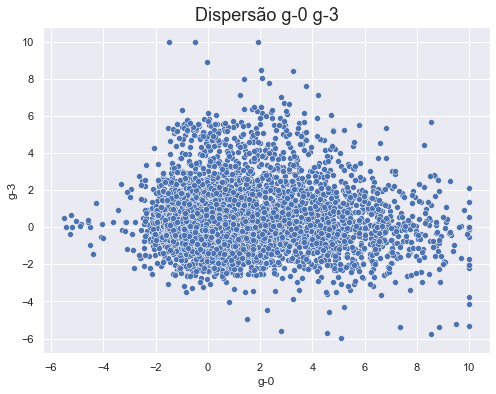

In [7]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x='g-0', y='g-3', data=dados)
ax.set_title('Dispersão g-0 g-3', fontsize=18)
plt.show()

O gráfico de dispersão plota um ponto relativo a cada entrada no recorte de dados das colunas *g-0* e *g-3*.

In [8]:
dados[['g-0', 'g-3']]

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


Mais um exemplo de gráfico de dispersão, desta vez relacionando os dados das colunas *g-0* e *g-8*:

In [9]:
dados[['g-0', 'g-8']]

,g-0,g-8
0,1.0620,0.5548
1,0.0743,-0.4047
2,0.6280,0.0065
3,-0.5138,-0.1321
4,-0.3254,-0.8789
...,...,...
23809,0.1394,-0.4726
23810,-1.3260,0.5112
23811,0.3942,-0.0340
23812,0.6660,0.4299


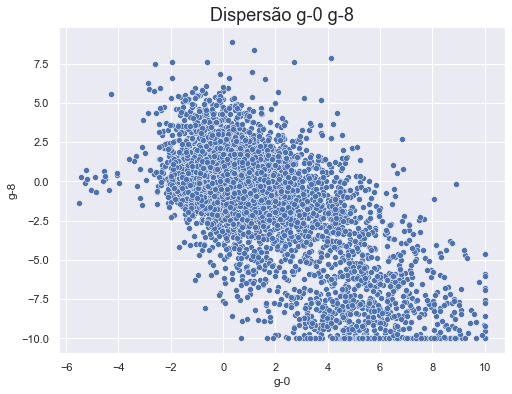

In [10]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x='g-0', y='g-8', data=dados)
ax.set_title('Dispersão g-0 g-8', fontsize=18)
plt.show()

Podemos traçar uma linha que ilustre alguma tendência ou padrão. Neste caso, utilizaremos o gráfico gerado pela função *lmplot* do *Seaborn*, que plota ***gráficos de regressão linear***.

Documentação: [seaborn.lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot)

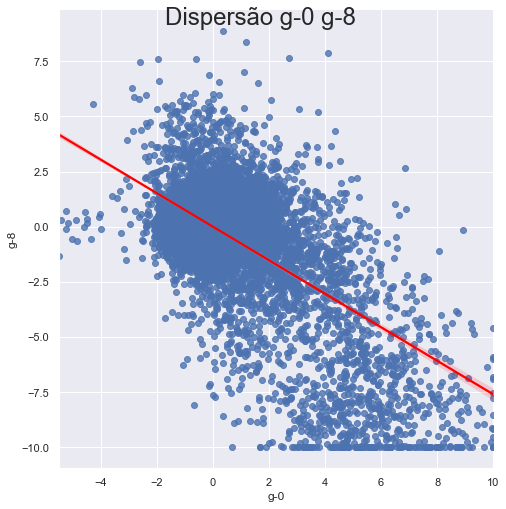

In [11]:
ax = sns.lmplot(x='g-0', y='g-8', data=dados, 
                height=7, line_kws={'color': 'red'})
ax.fig.suptitle('Dispersão g-0 g-8', fontsize=24)
plt.show()

Utilizando a opção *col* podemos selecior alguma coluna para filtrar os dados do gráfico de dispersão e como cada coluna contina nos eixos *x* e *y* se relacionam com esses dados. Exemplo utilizando os dados de *g-0* e *g-8* relacionados à coluna *tratamento*. Neste caso, vemos como a relação entre *g-0* e *g-8* muda conforme houve tratamento com alguma droga quando não houve tratamento com alguma droga (grupo de controle).

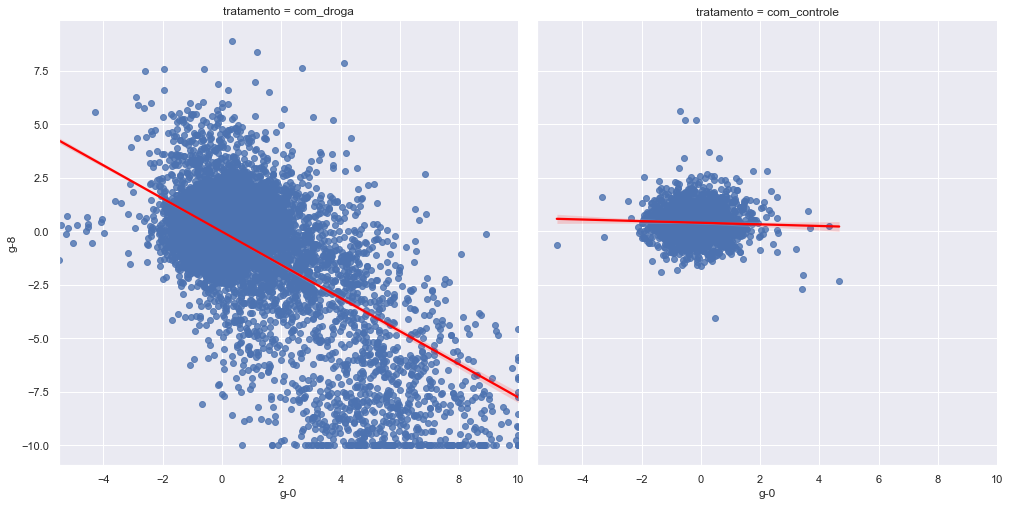

In [12]:
ax = sns.lmplot(x='g-0', y='g-8', data=dados, col='tratamento',
               height=7, line_kws={'color': 'red'})
plt.show()

É possível, ainda, relacionar mais dados utilizando a opção *col*. Exemplo utilizando os dados de *g-0* e *g-8* relacionados à coluna *tratamento* e à coluna *tempo*. No gráfico, *tratamento* aparece como coluna e *tempo* como linha.

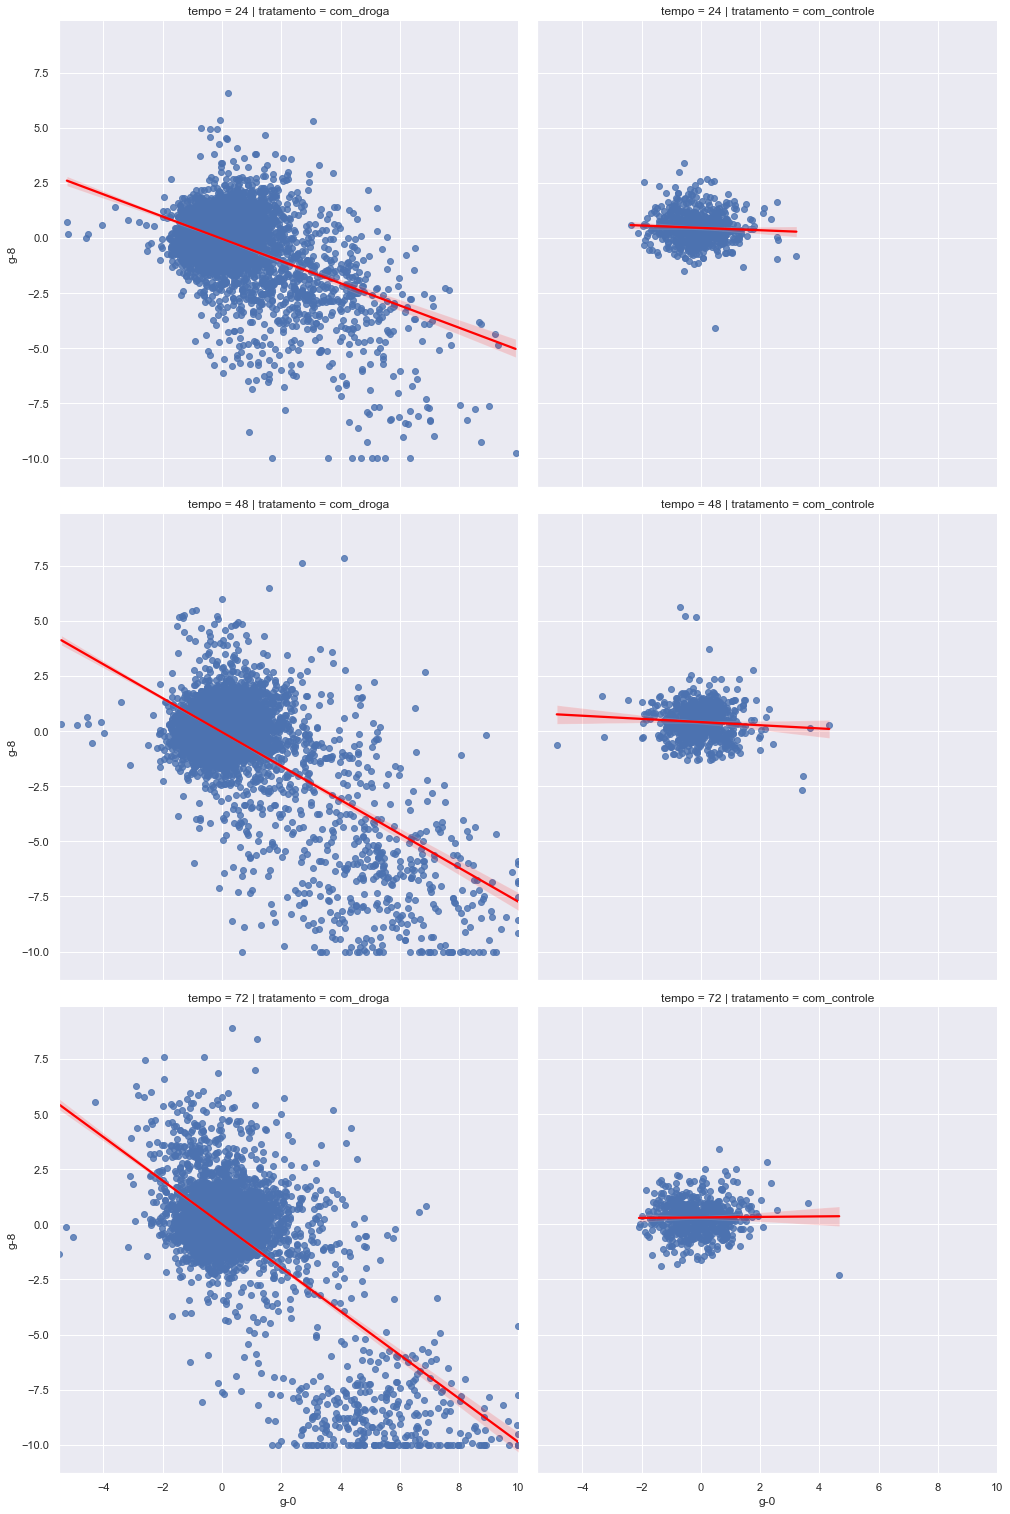

In [13]:
ax = sns.lmplot(x='g-0', y='g-8', data=dados, col='tratamento',
                row='tempo', height=7, line_kws={'color': 'red'})
plt.show()

### Correlação entre dados

A correlação entre dados é calculada pelo método *corr* do pandas.
Os valores podem ser diretamente ou inversamente correlacionados

Documentação: [pandas.Series.corr](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html)

#### Correlação das expressões gênicas

A tabela a seguir mostra a correlação entre os dados das expressões gênicas contidos na série que compreende a coluna *g-0* à coluna *g-50*:

In [14]:
corr_g = dados.loc[:, 'g-0':'g-50'].corr()

In [15]:
corr_g

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,-0.499815,-0.203828,0.021582,-0.023423,-0.119687,0.530238,0.039827,0.238235,0.310583,-0.560201
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.110238,0.133896,0.161186,-0.092498,0.031993,0.097674,-0.012420,0.029064,-0.106349,-0.028870
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,-0.109646,-0.121433,-0.086435,0.021241,-0.036105,0.142712,-0.009575,0.039119,0.052003,-0.140002
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,-0.047136,-0.010941,-0.168398,-0.001770,0.065444,0.082046,0.297146,0.173796,0.072970,-0.233491
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.373390,0.071462,0.185361,-0.105936,-0.033695,0.355833,-0.060724,0.006138,0.114748,-0.315675
g-5,-0.165478,-0.151590,0.018516,0.042231,-0.057449,1.000000,0.083620,0.102345,0.073885,0.126561,...,0.206885,0.120727,-0.031065,-0.047988,0.090507,-0.176810,0.023328,0.039471,-0.127953,0.128877
g-6,0.238348,-0.122541,0.015190,-0.043177,0.206405,0.083620,1.000000,0.030544,-0.212292,-0.134739,...,-0.006081,-0.170005,0.137326,0.053565,-0.003568,0.094446,-0.045317,-0.074863,0.104435,0.026171
g-7,-0.374451,0.144537,-0.144205,-0.175692,-0.032748,0.102345,0.030544,1.000000,0.278085,0.288780,...,0.375000,0.238965,0.278872,-0.067301,0.164081,-0.362947,-0.048746,-0.394381,-0.323902,0.576532
g-8,-0.604212,-0.009973,-0.128029,-0.086167,-0.474828,0.073885,-0.212292,0.278085,1.000000,0.330284,...,0.538558,0.182810,0.046310,0.045865,0.138570,-0.528122,-0.122435,-0.086971,-0.348920,0.489859
g-9,-0.428779,-0.047558,-0.081332,-0.014052,-0.274167,0.126561,-0.134739,0.288780,0.330284,1.000000,...,0.313713,0.139294,-0.064036,0.004905,0.108596,-0.342196,0.133420,-0.147974,-0.184057,0.412596


O gráfico a seguir plota uma matriz de correlação com os dados referentes à tabela anterior:

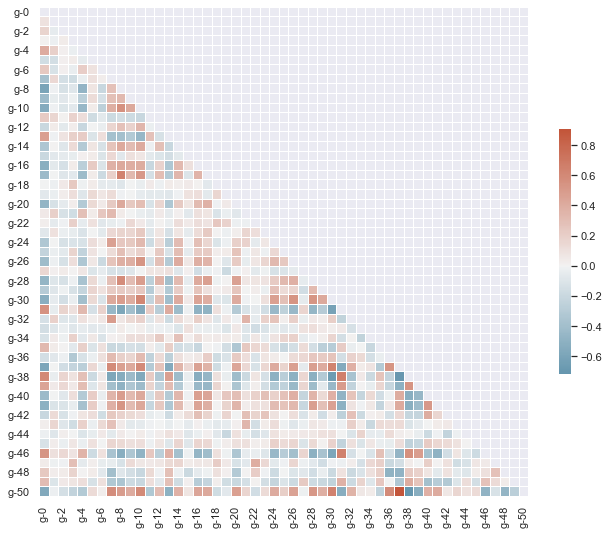

In [16]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_g, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_g, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### Correlação dos tipos celulares

A tabela a seguir mostra a correlação entre os dados dos tipos celulares contidos na série que compreende a coluna *c-0* à coluna *c-50*:

In [17]:
corr_c = dados.loc[:, 'c-0':'c-50'].corr()

In [18]:
corr_c

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,...,c-41,c-42,c-43,c-44,c-45,c-46,c-47,c-48,c-49,c-50
c-0,1.000000,0.827336,0.848472,0.798830,0.840695,0.844469,0.811946,0.793171,0.842977,0.759971,...,0.848941,0.847747,0.827377,0.847072,0.824247,0.816332,0.819386,0.778280,0.792811,0.797689
c-1,0.827336,1.000000,0.901416,0.808364,0.879258,0.869569,0.876924,0.793199,0.879892,0.812345,...,0.870896,0.891842,0.869508,0.851121,0.858537,0.828145,0.854667,0.853745,0.845159,0.839386
c-2,0.848472,0.901416,1.000000,0.830759,0.909991,0.882794,0.898819,0.812980,0.896087,0.821522,...,0.889876,0.909086,0.886977,0.880717,0.875814,0.854217,0.874174,0.863002,0.853704,0.848724
c-3,0.798830,0.808364,0.830759,1.000000,0.831523,0.829550,0.805506,0.752940,0.830369,0.765626,...,0.821351,0.838118,0.821934,0.813087,0.806219,0.808859,0.812784,0.804207,0.818632,0.821138
c-4,0.840695,0.879258,0.909991,0.831523,1.000000,0.883526,0.893285,0.808096,0.888384,0.822614,...,0.880368,0.913242,0.875934,0.878659,0.869324,0.862019,0.862095,0.862338,0.855029,0.851843
c-5,0.844469,0.869569,0.882794,0.829550,0.883526,1.000000,0.863932,0.794140,0.875615,0.810827,...,0.880703,0.897040,0.876421,0.860547,0.855910,0.841310,0.862328,0.861956,0.851853,0.864223
c-6,0.811946,0.876924,0.898819,0.805506,0.893285,0.863932,1.000000,0.796485,0.873232,0.839685,...,0.895083,0.908299,0.860556,0.874571,0.873974,0.828976,0.863283,0.857008,0.847009,0.825720
c-7,0.793171,0.793199,0.812980,0.752940,0.808096,0.794140,0.796485,1.000000,0.812357,0.728066,...,0.817912,0.832790,0.783834,0.838290,0.811981,0.779971,0.799859,0.766085,0.766224,0.760949
c-8,0.842977,0.879892,0.896087,0.830369,0.888384,0.875615,0.873232,0.812357,1.000000,0.827942,...,0.877598,0.902105,0.868428,0.868056,0.867145,0.844069,0.878245,0.859035,0.858434,0.846038
c-9,0.759971,0.812345,0.821522,0.765626,0.822614,0.810827,0.839685,0.728066,0.827942,1.000000,...,0.815802,0.852711,0.795000,0.808868,0.827258,0.782585,0.845719,0.811122,0.818514,0.796463


O gráfico a seguir plota uma matriz de correlação com os dados referentes à tabela anterior:

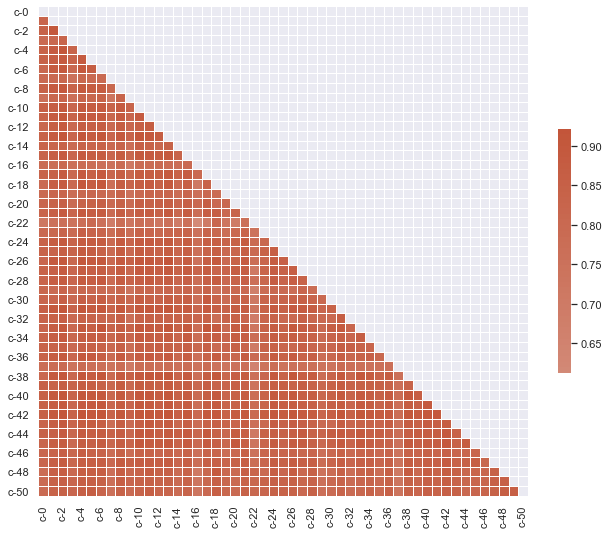

In [19]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_c, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_c, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Desafios da Aula 03

### Desafio 01

#### Gerar uma tabela de frequência com a função *groupby*

Utilizaremos a função *groubpy* do pandas para gerar uma tabela de frequência. 

Documentação: [pandas.DataFrame.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

Na tabela abaixo, é gerada uma tabela de frequência relacionando as colunas *dose* e *tempo* à coluna *tratamento*.

In [20]:
dados.groupby(['dose', 'tempo'])['tratamento'].value_counts().unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

### Desafio 02

#### Normalizar a tabela anterior pela coluna

Na tabela abaixo, é gerada uma versão normalizada da tabela anterior.

In [21]:
dados.groupby(['dose', 'tempo'])['tratamento'].value_counts(normalize=True).unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

### Desafio 03

#### Explorar outros agregadores além de *mean*

Aqui geramos uma tabela de frequência relacionando as colunas dose e tempo à coluna tratamento e à máxima dos dados contidos na coluna g-0.

In [22]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], 
           values=dados['g-0'], aggfunc='max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

Aqui geramos uma tabela de frequência relacionando as colunas dose e tempo à coluna tratamento e à mínima dos dados contidos na coluna g-0.

In [23]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], 
           values=dados['g-0'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

### Desafio 04

#### Explorar o melt

A função *melt* do pandas transforma um dataframe existente, mudando a orientação de um formato amplo para um formato longo.

Documentação: [pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

No exemplo a seguir, vamos utilizar os valores da colusa *dose* com os valores de *g-0*, utilizando a função *melt*:

In [24]:
pd.melt(dados, id_vars=['dose'], value_vars=['g-0'])

,dose,variable,value
0,D1,g-0,1.0620
1,D1,g-0,0.0743
2,D1,g-0,0.6280
3,D1,g-0,-0.5138
4,D2,g-0,-0.3254
...,...,...,...
23809,D2,g-0,0.1394
23810,D2,g-0,-1.3260
23811,D2,g-0,0.3942
23812,D1,g-0,0.6660


### Desafio 05

#### Calcular e analisar a correção entre as expressões gênicas e os tipos celulares e refletir sobre os efeitos biológicos

O gráfico a seguir mostra a correlação entre os dados das expressões gênicas com os tipos celulares contidos na série que compreende a coluna *g-0* à coluna *c-99*, limitando às 50 primeiras amostragens:

In [30]:
corr = dados.loc[:, 'g-0':'c-99'].corr()

In [32]:
corr_cel_gen = corr.loc['g-0':'g-50', 'c-0':'c-50']

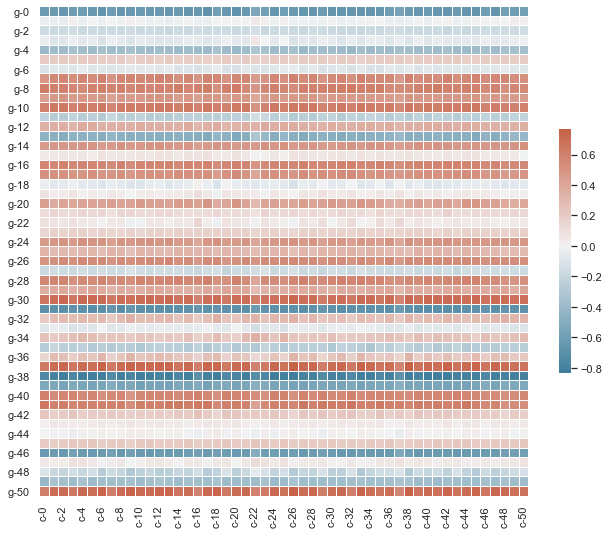

In [37]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_cel_gen, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Desafio 06

#### Estudar o código que plota a matriz de correlação

O código da matriz de correlação utilizada neste notebook pode ser encontrado no seguinte link: [Plotting a diagonal correlation matrix](https://seaborn.pydata.org/examples/many_pairwise_correlations.html).

```Python
# Cria uma série de correlação que inclue as colunas no intervalo
# g-0 a g-50
corr_g = dados.loc[:, 'g-0':'g-50'].corr()

# Cria uma máscara para o triângulo superior a partir
# de uma matriz de 1 no tamanho do dataframe corr_g
mask = np.triu(np.ones_like(corr_g, dtype=bool))

# define um subplot
f, ax = plt.subplots(figsize=(11, 9))

# Geram uma paleta de cores em que fica azulada quando
# se dirige às correlações negativas e alaranjada
# quando se dirige às correlações positivas
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# Plota um mapa de calor utilizando a máscara e a paleta de cores
# definidas anteriormente
sns.heatmap(corr_g, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
```

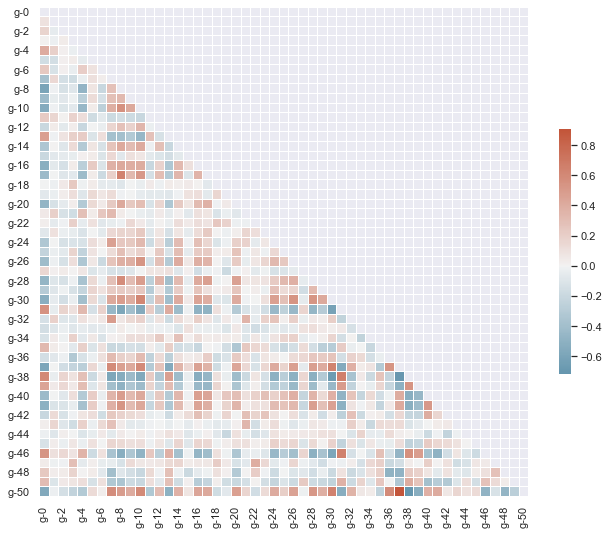

In [38]:
# Cria uma série de correlação que inclue as colunas no intervalo
# g-0 a g-50
corr_g = dados.loc[:, 'g-0':'g-50'].corr()

# Cria uma máscara para o triângulo superior a partir
# de uma matriz de 1 no tamanho do dataframe corr_g
mask = np.triu(np.ones_like(corr_g, dtype=bool))

# define um subplot
f, ax = plt.subplots(figsize=(11, 9))

# Geram uma paleta de cores em que fica azulada quando
# se dirige às correlações negativas e alaranjada
# quando se dirige às correlações positivas
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# Plota um mapa de calor utilizando a máscara e a paleta de cores
# definidas anteriormente
sns.heatmap(corr_g, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Desafio 07

#### Resumo do que foi aprendido

Nesta aula aprendemos a gerar tabelas de frequência utilizando tanto as funções *crosstab* quando *groupby*. Aprendemos, também a plotar gráficos de dispersão e de regressão linear com as funções do Seaborn *scatterplot* e *lmplot*, respectivamente.

Além disso, pudemos demonstrar a correlação entre expressões gênicas e tipos celulares por meio de um mapa de calor, fornecido pela função *heatmap* do Seaborn, que mostra correlações diretamente e inversamente proporcionais.